In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
df= pd.read_csv('advertising.csv')

### Explore Data

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [8]:
df.shape

(200, 4)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [18]:
df['Sales'].describe()

count    200.000000
mean      15.130500
std        5.283892
min        1.600000
25%       11.000000
50%       16.000000
75%       19.050000
max       27.000000
Name: Sales, dtype: float64

In [25]:
df.duplicated().sum()

0

In [27]:
df['Sales'].value_counts().sort_values(ascending=True)

Sales
11.9    5
16.7    5
20.7    4
11.0    3
11.3    3
       ..
13.4    1
24.2    1
8.1     1
5.5     1
25.5    1
Name: count, Length: 121, dtype: int64

In [46]:
df['Sales'].value_counts().sort_values(ascending=False)

Sales
11.9    5
16.7    5
20.7    4
18.4    3
17.3    3
       ..
9.5     1
22.1    1
22.3    1
9.4     1
25.5    1
Name: count, Length: 121, dtype: int64

<Axes: xlabel='Sales', ylabel='Count'>

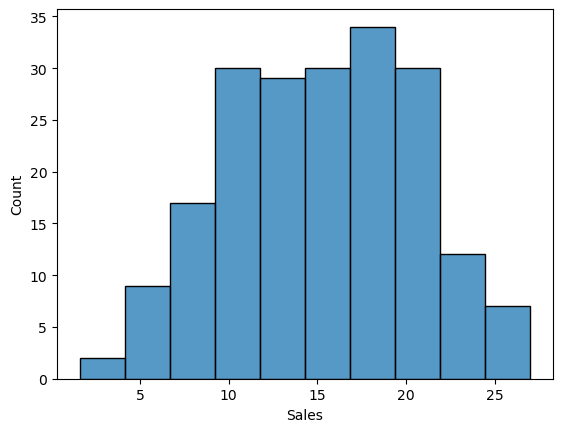

In [66]:
sns.histplot(df.Sales)


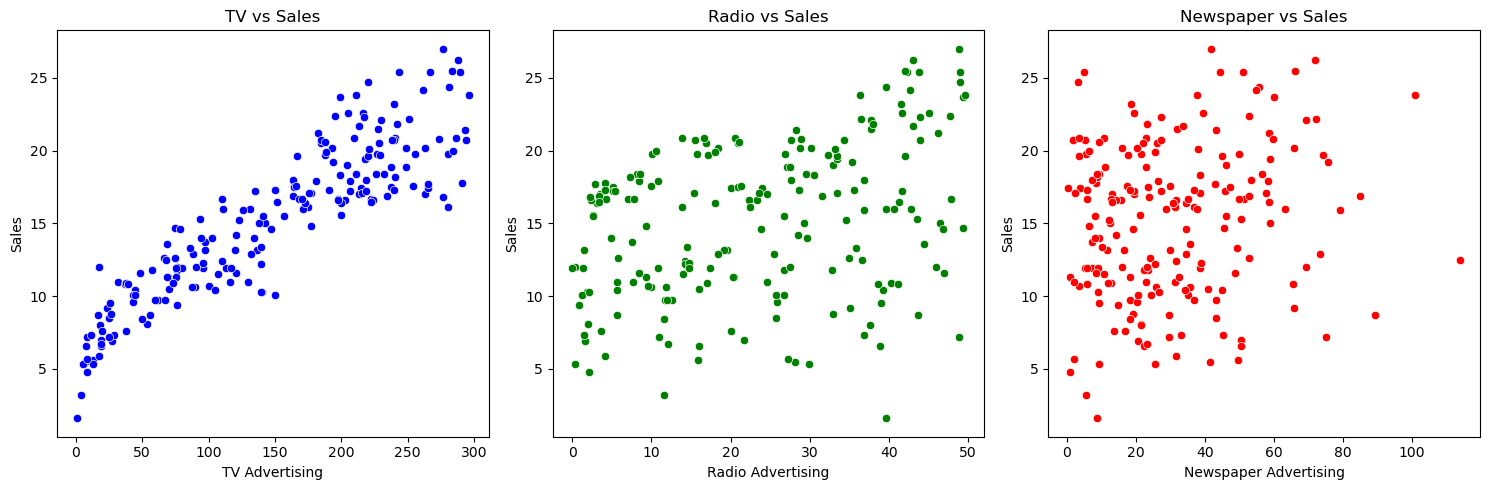

In [83]:

plt.figure(figsize=(15, 5))

# TV vs Sales
plt.subplot(1, 3, 1)
sns.scatterplot(x='TV', y='Sales', data=df, color='blue')
plt.title('TV vs Sales')
plt.xlabel('TV Advertising')
plt.ylabel('Sales')

# Radio vs Sales
plt.subplot(1, 3, 2)
sns.scatterplot(x='Radio', y='Sales', data=df, color='green')
plt.title('Radio vs Sales')
plt.xlabel('Radio Advertising')
plt.ylabel('Sales')

# Newspaper vs Sales
plt.subplot(1, 3, 3)
sns.scatterplot(x='Newspaper', y='Sales', data=df, color='red')
plt.title('Newspaper vs Sales')
plt.xlabel('Newspaper Advertising')
plt.ylabel('Sales')

plt.tight_layout()
plt.show()

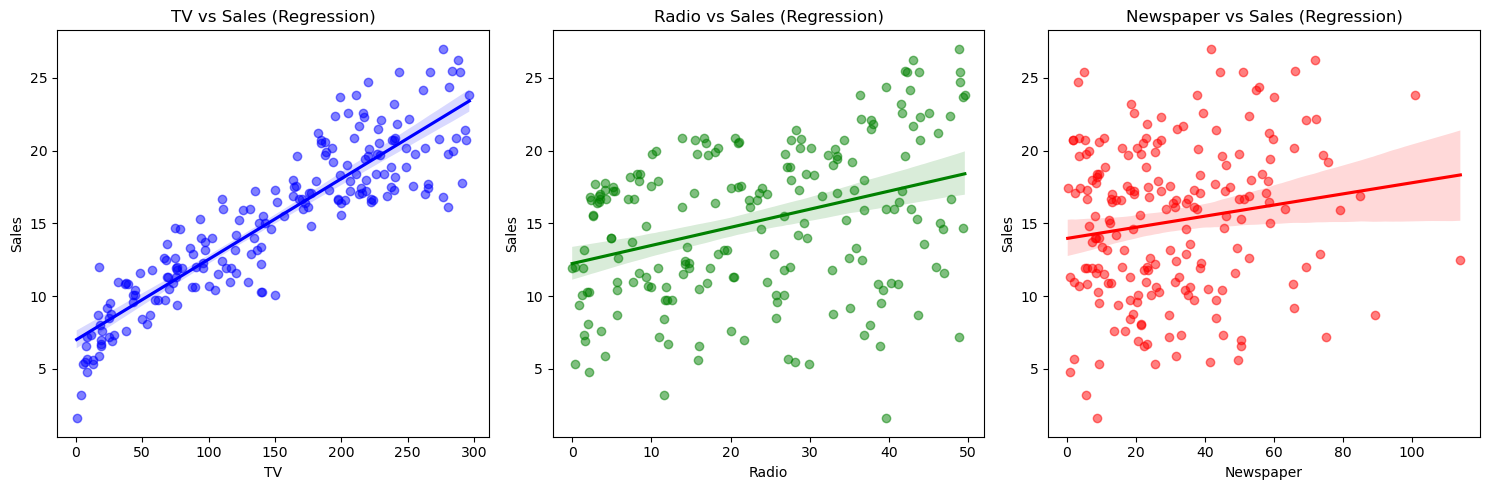

In [85]:
plt.figure(figsize=(15, 5))

# TV vs Sales (Regression)
plt.subplot(1, 3, 1)
sns.regplot(x='TV', y='Sales', data=df, color='blue', scatter_kws={'alpha':0.5})
plt.title('TV vs Sales (Regression)')

# Radio vs Sales (Regression)
plt.subplot(1, 3, 2)
sns.regplot(x='Radio', y='Sales', data=df, color='green', scatter_kws={'alpha':0.5})
plt.title('Radio vs Sales (Regression)')

# Newspapers vs Sales (Regression)
plt.subplot(1, 3, 3)
sns.regplot(x='Newspaper', y='Sales', data=df, color='red', scatter_kws={'alpha':0.5})
plt.title('Newspaper vs Sales (Regression)')

plt.tight_layout()
plt.show()

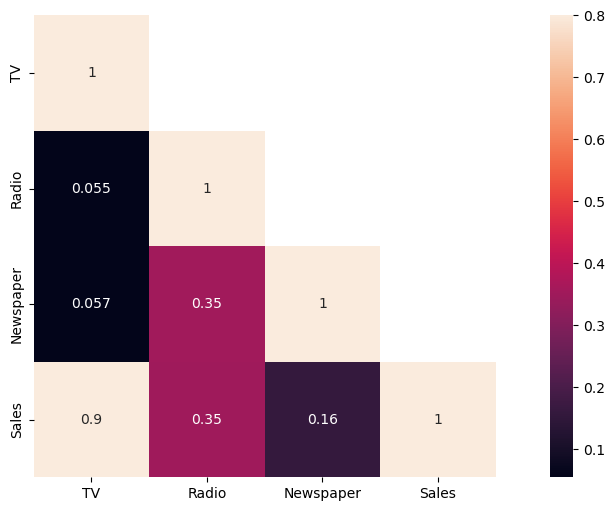

In [87]:
corrMatt = df.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(14,6)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)
plt.show()

### Create Model

In [89]:
x=df.drop(['Sales'],axis=1)
y=df['Sales']

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=1234)

score=[]
r_2=[]
rmse=[]
mae=[]

def reg(model):
    model.fit(x_train,y_train)
    pred = model.predict(x_test)

    SCORE=model.score(x_test,y_test)
    R2 = r2_score(y_test,pred)
    RMSE = math.sqrt(mean_squared_error(y_test,pred))
    MAE = mean_absolute_error(y_test,pred)
    
    score.append(SCORE)
    r_2.append(R2)
    rmse.append(RMSE)
    mae.append(MAE)

In [91]:
m1=LinearRegression()
m2=XGBRegressor()
m3=RandomForestRegressor()
m4=DecisionTreeRegressor()
m5=SVR()
m6=GradientBoostingRegressor()

In [93]:
Algorithms = ['LinearRegression','XGBRegressor','RandomForestRegressor','DecisionTreeRegressor','SVR','GradientBoostingRegressor']

In [95]:
reg(m1)
reg(m2)
reg(m3)
reg(m4)
reg(m5)
reg(m6)

In [97]:
result=pd.DataFrame({'Algorithms':Algorithms,'Score':score,'R2':r_2,'rmse':rmse,'mae':mae})
result

,Algorithms,Score,R2,rmse,mae
0,LinearRegression,0.908664,0.908664,1.739505,1.282536
1,XGBRegressor,0.926411,0.926411,1.561383,1.064938
2,RandomForestRegressor,0.927478,0.927478,1.550026,1.091200
3,DecisionTreeRegressor,0.912486,0.912486,1.702718,1.202500
4,SVR,0.861882,0.861882,2.139091,1.654274
5,GradientBoostingRegressor,0.931129,0.931129,1.510504,1.100202


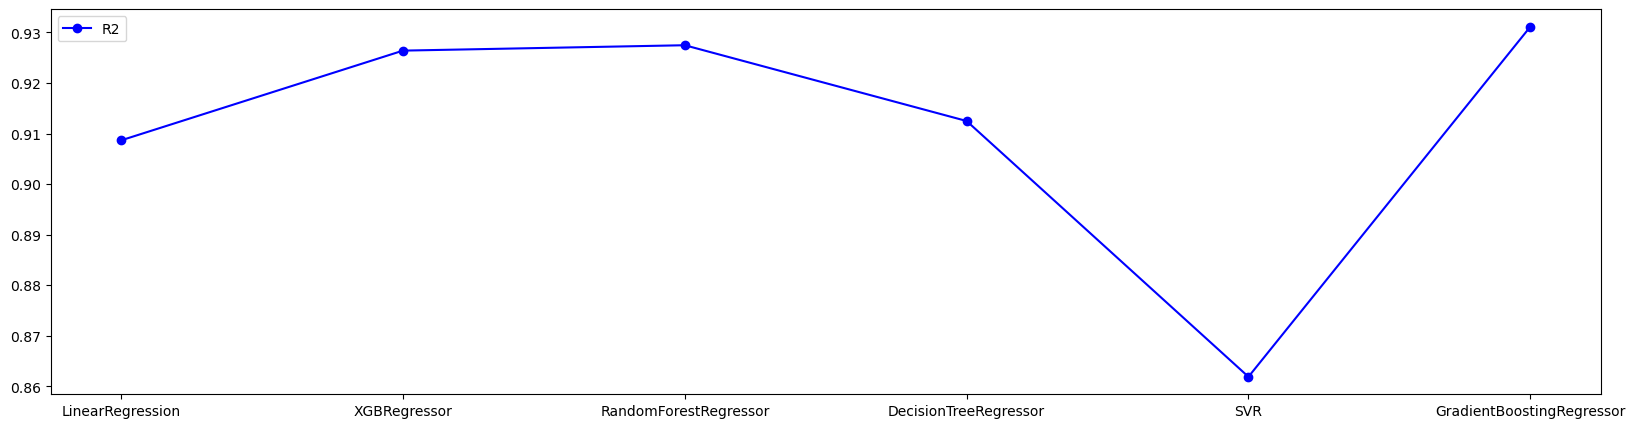

In [99]:
fig,sx=plt.subplots(figsize=(20,5))
plt.plot(result.Algorithms,result.R2,label='R2',c='b',marker='o')
plt.legend()
plt.show()


In [103]:
# import joblib

# joblib.dump(m6, 'Sales_regression.pkl')
# print("Model saved successfully!")

Model saved successfully!
